In [2]:
#@Copyright Tal Yarkoni
# Import everything we'll need
from neurosynth import Dataset
from neurosynth.base.dataset import download
from neurosynth.analysis import meta
from nilearn import plotting
from matplotlib import pyplot as plt
%matplotlib inline

### Load Neurosynth Dataset

In [4]:
import os
os.chdir(r'F:\UPDATE\RESEARCHBLOG_GAO\dataScience_2_meta_analysis_methods\Meta_Analysis_fMRI\Method3_NeuroSynth')

In [5]:
%pwd

'F:\\UPDATE\\RESEARCHBLOG_GAO\\dataScience_2_meta_analysis_methods\\Meta_Analysis_fMRI\\Method3_NeuroSynth'

In [9]:
# Here we're loading a pre-pickled dataset to save time, but it can be re-created
# from scratch by replacing the next line with the following two commented lines
dataset = Dataset.load('F:\\UPDATE\\RESEARCHBLOG_GAO\\dataScience_2_meta_analysis_methods\\Meta_Analysis_fMRI\\neurosynth\\data\\dataset.pkl') # Huge file not included in repo
# download(unpack=True)
# dataset = Dataset('database.txt')

### Plot forward and reverse inference maps for 'dACC'

In [11]:
# Assumes features.txt file is in same directory. If not,
# grab it with download() call first (see above).
dataset.add_features(r'F:\UPDATE\RESEARCHBLOG_GAO\dataScience_2_meta_analysis_methods\Meta_Analysis_fMRI\neurosynth\data\features.txt', append=False)
ids = dataset.get_studies('dacc', frequency_threshold=0.05)
ma = meta.MetaAnalysis(dataset, ids)
ma.save_results(prefix='dacc')

C:\Users\CHUANJI\AppData\Roaming\Python\Python37\site-packages\nilearn\plotting\displays.py:767: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))


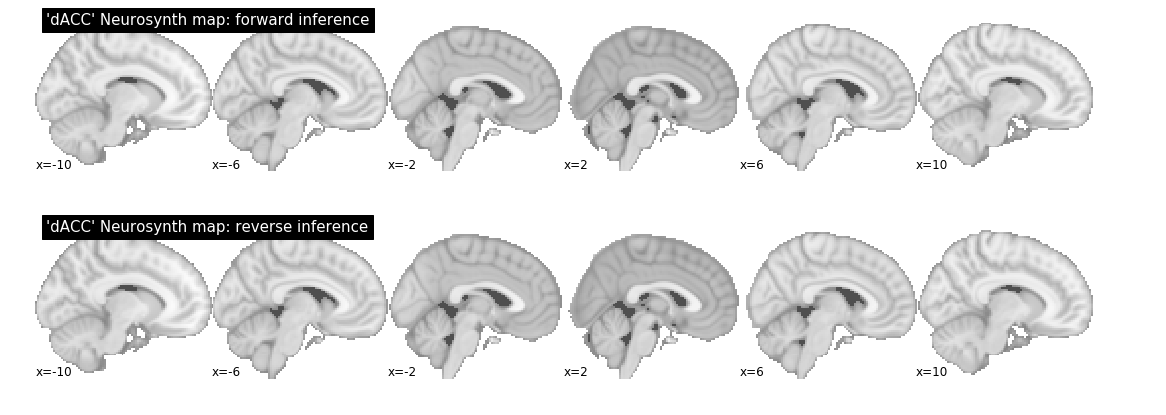

In [13]:
# Plot both forward and reverse inference maps
cc = [-10, -6, -2, 2, 6, 10]
threshold = 3.3
fig, axes = plt.subplots(2, 1, figsize=(20, 7))
plotting.plot_stat_map('dacc_pAgF.nii.gz', display_mode='x', cut_coords=cc, threshold=threshold,
                       title="'dACC' Neurosynth map: forward inference", vmax=16, axes=axes[0])
plotting.plot_stat_map('dacc_pFgA.nii.gz', display_mode='x', cut_coords=cc, threshold=threshold,
                       title="'dACC' Neurosynth map: reverse inference", vmax=16, axes=axes[1])

### Define topics and save meta-analysis maps

In [14]:
# Use topics rather than terms for increased sensitivity/construct validity.
# May need to unzip this file first if obtained from GitHub.
dataset.add_features(r'F:\UPDATE\RESEARCHBLOG_GAO\dataScience_2_meta_analysis_methods\Meta_Analysis_fMRI\neurosynth\examples\dacc-pain-analyses\v4-topics-200.txt', append=False)

# Topic loading threshold for assignment to group; same as website
ft = 0.05

# Save the pain topic; we'll use this as a reference
pain_ids = dataset.get_studies('61_pain_painful_stimulation', frequency_threshold=ft)
ma = meta.MetaAnalysis(dataset, pain_ids)
ma.save_results(output_dir='.', prefix='pain')

# Define/name the comparison topics
topics = {
    'conflict': '39_conflict_monitoring_response',
    'emotion': '43_emotional_neutral_processing',
    'touch': '67_stimulation_somatosensory_tactile',
    'reward': '40_reward_monetary_anticipation',
    'autonomic': '90_autonomic_arousal_physiological',
    'salience': '168_salience_salient_interoceptive',
    'fear': '123_fear_conditioning_cs',
    'inhibition': '37_inhibition_response_inhibitory',
    'empathy': '28_empathy_perspective_person',
    'cognitive control': '57_control_cognitive_increased'
}

# Loop over comparison topics, save topic vs. not-topic
# and topic vs. pain meta-analysis maps.
ids = {}
for k, v in topics.items():
    print(k, v)
    ids[k] = dataset.get_studies(v, frequency_threshold=ft)
    
    # term vs. all others
    ma = meta.MetaAnalysis(dataset, ids[k])
    ma.save_results(output_dir='.', prefix='%s' % k)
    
    # Now contrast with pain
    ma = meta.MetaAnalysis(dataset, pain_ids, ids[k])
    ma.save_results(output_dir='.', prefix='pain_vs_%s' % k)

conflict 39_conflict_monitoring_response
emotion 43_emotional_neutral_processing
touch 67_stimulation_somatosensory_tactile
reward 40_reward_monetary_anticipation
autonomic 90_autonomic_arousal_physiological
salience 168_salience_salient_interoceptive
fear 123_fear_conditioning_cs
inhibition 37_inhibition_response_inhibitory
empathy 28_empathy_perspective_person
cognitive control 57_control_cognitive_increased


### Plot meta-analytic contrasts

In [15]:
cc = [-8, -4, 0, 4, 8]  # x-coordinates of slices
threshold = 3.3  # z-score threshold (p < .001)

# Contrasts involving pain
pain_contrasts = ['autonomic', 'fear', 'conflict', 'touch', 'emotion', 'salience', 'cognitive control']

# Additional contrasts for illustration
extras = [('autonomic', 'emotion'),
             ('fear', 'cognitive control')
            ]


fig, axes = plt.subplots(len(pain_contrasts + extras), 1, figsize=(16, 3.5*len(contrasts + extras)))
for i, k in enumerate(pain_contrasts):
    plotting.plot_stat_map('pain_vs_%s_pFgA.nii.gz' % k, display_mode='x', cut_coords=cc, threshold=threshold,
                      title='pain - %s' % k, axes=axes[i], vmax=6)

for i, (c1, c2) in enumerate(extras):
    ma = meta.MetaAnalysis(dataset, ids[c1], ids[c2])
    ma.save_results(output_dir='.', prefix='%s_vs_%s' % (c1, c2))
    plotting.plot_stat_map('%s_vs_%s_pFgA.nii.gz' % (c1, c2), display_mode='x', cut_coords=cc, threshold=threshold,
                      title='%s - %s' % (c1, c2), axes=axes[i+len(pain_contrasts)], vmax=6)

NameError: name 'contrasts' is not defined

### Plot reverse inference maps for pain and non-pain terms

C:\Users\CHUANJI\AppData\Roaming\Python\Python37\site-packages\nilearn\plotting\displays.py:767: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))


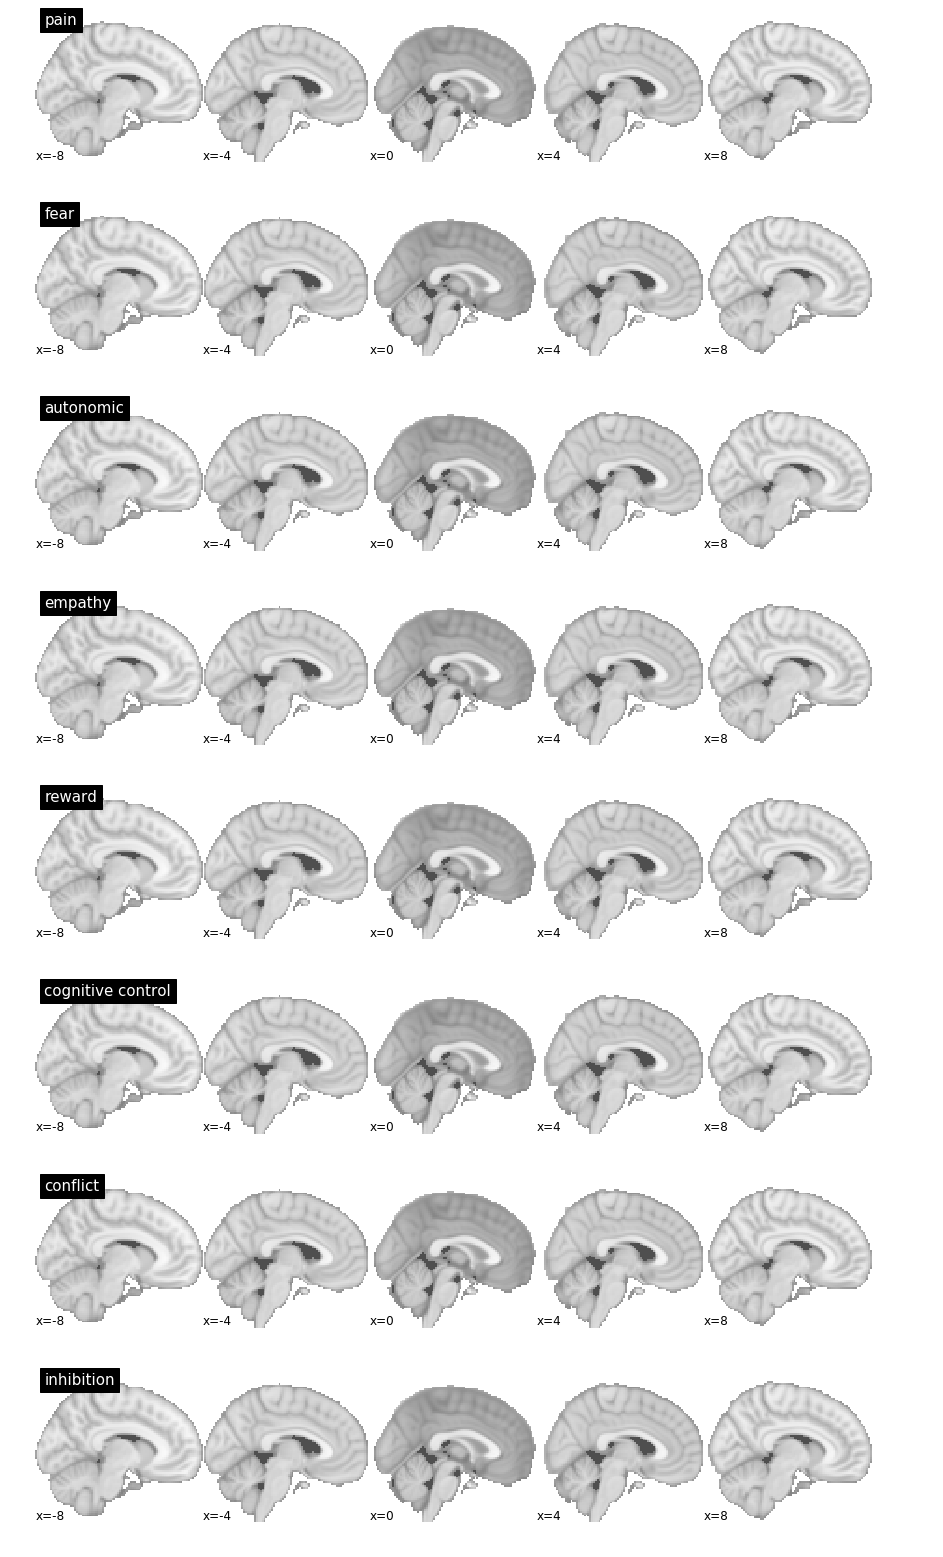

In [16]:
targets = ['pain', 'fear', 'autonomic', 'empathy', 'reward', 'cognitive control', 'conflict', 'inhibition']
fig, axes = plt.subplots(len(targets), 1, figsize=(16, 3.5*len(targets)))
for i, t in enumerate(targets):
    plotting.plot_stat_map('%s_pFgA.nii.gz' % t, display_mode='x', cut_coords=[-8, -4, 0, 4, 8],
                           threshold=3.3, vmax=15, title=t, axes=axes[i])